# Gold Price Analysis

This notebook analyzes historical gold price data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline


## Load Data


In [2]:
# Load gold price data
df_gold = pd.read_csv('datasets/gold stock/gold_price_data.csv')

print(f"Dataset shape: {df_gold.shape}")
print(f"Total records: {len(df_gold)}")
display(df_gold.head(10))
df_gold.info()


Dataset shape: (5215, 7)
Total records: 5215


,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
1,2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2,2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
3,2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
4,2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100
5,2004-11-26,45.290001,45.290001,45.599998,45.060001,45.250000,3097700
6,2004-11-29,45.400002,45.400002,45.500000,45.080002,45.099998,3759000
7,2004-11-30,45.119999,45.119999,45.410000,44.820000,45.369999,3857200
8,2004-12-01,45.380001,45.380001,45.590000,45.259998,45.279999,2037500
9,2004-12-02,44.950001,44.950001,45.570000,44.680000,45.549999,6457800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5215 entries, 0 to 5214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       5215 non-null   object 
 1   open       5215 non-null   float64
 2   high       5215 non-null   float64
 3   low        5215 non-null   float64
 4   close      5215 non-null   float64
 5   adj_close  5215 non-null   float64
 6   volume     5215 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 285.3+ KB


## Data Preprocessing


In [3]:
# Convert date column to datetime
date_col = None
for col in df_gold.columns:
    if 'date' in col.lower():
        try:
            df_gold[col] = pd.to_datetime(df_gold[col])
            date_col = col
            print(f"Converted {col} to datetime format")
            break
        except:
            pass

if date_col:
    df_gold = df_gold.sort_values(date_col)
    print(f"\nDate range: {df_gold[date_col].min()} to {df_gold[date_col].max()}")


Converted date to datetime format

Date range: 2004-11-18 00:00:00 to 2025-08-12 00:00:00


## Gold Price Visualization


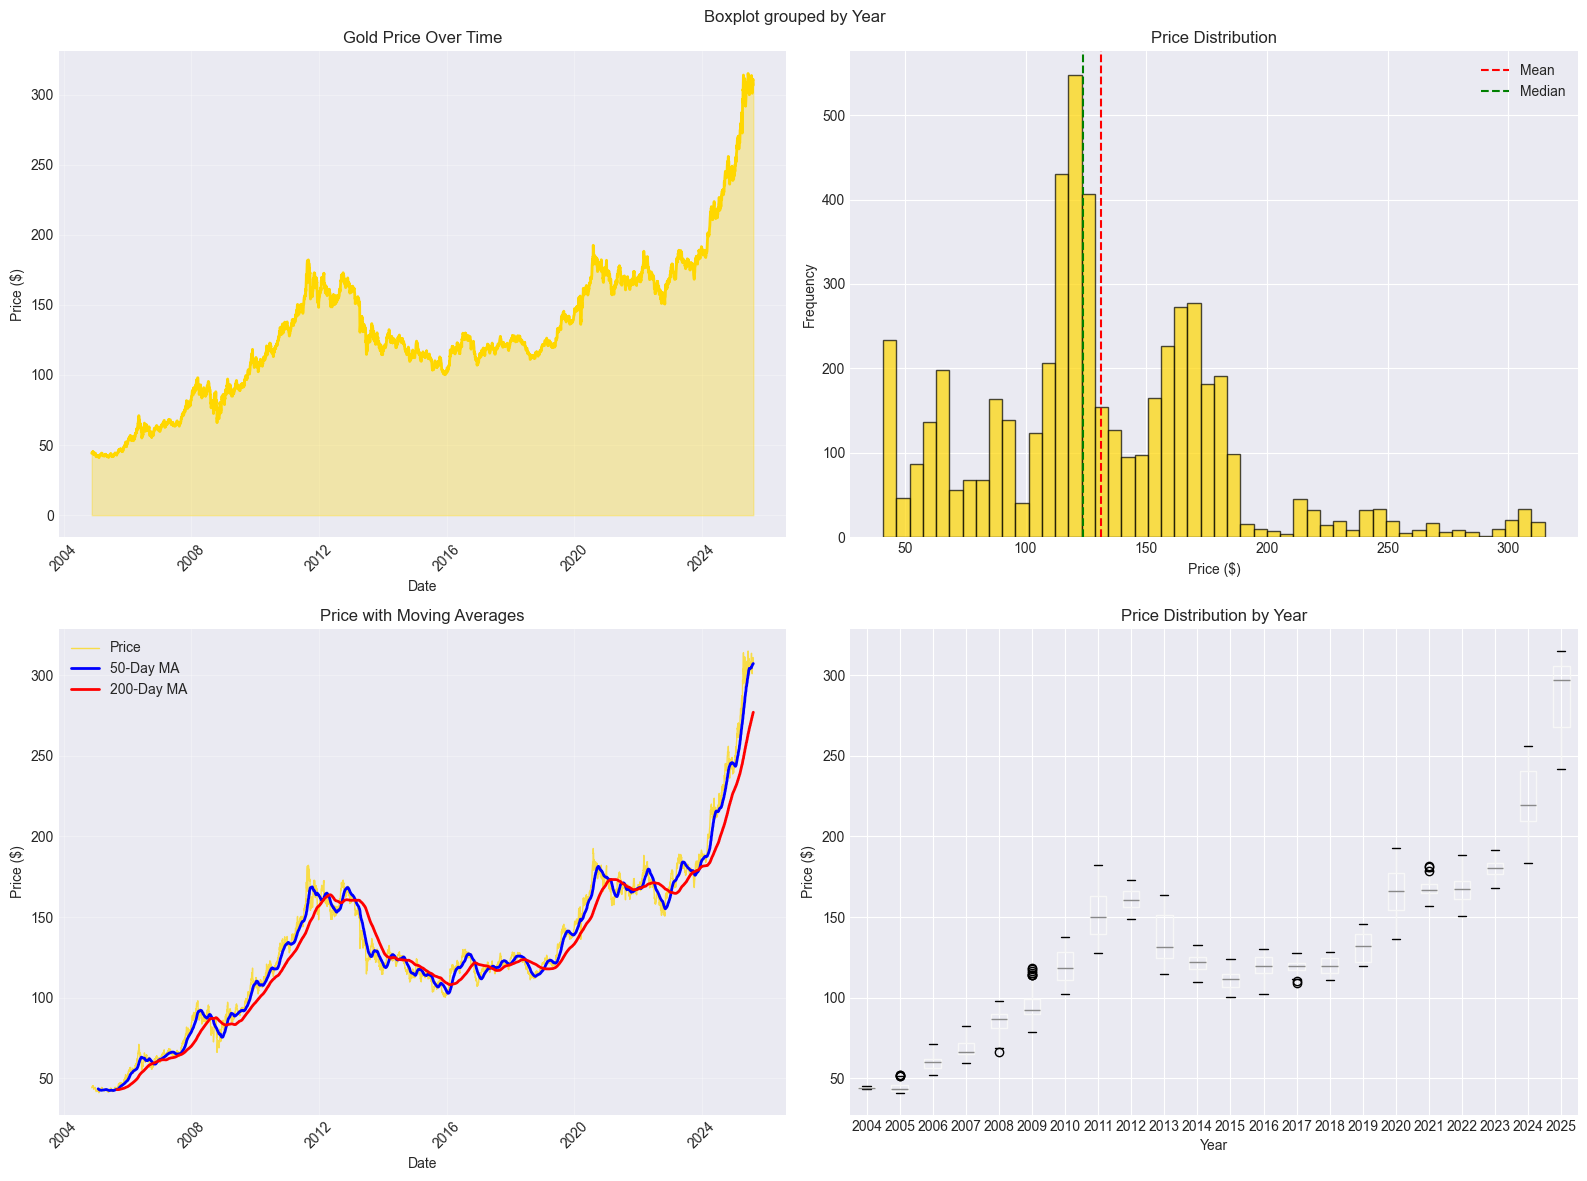

In [4]:
price_cols = [col for col in df_gold.columns if any(x in col.lower() for x in ['price', 'close', 'value'])]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Gold Price Analysis', fontsize=16, fontweight='bold')

if date_col and price_cols:
    axes[0, 0].plot(df_gold[date_col], df_gold[price_cols[0]], linewidth=2, color='gold')
    axes[0, 0].set_title('Gold Price Over Time')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Price ($)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].fill_between(df_gold[date_col], df_gold[price_cols[0]], alpha=0.3, color='gold')

if price_cols:
    axes[0, 1].hist(df_gold[price_cols[0]].dropna(), bins=50, edgecolor='black', alpha=0.7, color='gold')
    axes[0, 1].set_title('Price Distribution')
    axes[0, 1].set_xlabel('Price ($)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].axvline(df_gold[price_cols[0]].mean(), color='red', linestyle='--', label='Mean')
    axes[0, 1].axvline(df_gold[price_cols[0]].median(), color='green', linestyle='--', label='Median')
    axes[0, 1].legend()

if date_col and price_cols:
    axes[1, 0].plot(df_gold[date_col], df_gold[price_cols[0]], linewidth=1, alpha=0.7, label='Price', color='gold')
    if len(df_gold) >= 50:
        df_gold['MA_50'] = df_gold[price_cols[0]].rolling(window=50).mean()
        axes[1, 0].plot(df_gold[date_col], df_gold['MA_50'], linewidth=2, label='50-Day MA', color='blue')
    if len(df_gold) >= 200:
        df_gold['MA_200'] = df_gold[price_cols[0]].rolling(window=200).mean()
        axes[1, 0].plot(df_gold[date_col], df_gold['MA_200'], linewidth=2, label='200-Day MA', color='red')
    axes[1, 0].set_title('Price with Moving Averages')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Price ($)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

if date_col and price_cols:
    df_gold['Year'] = df_gold[date_col].dt.year
    years = df_gold['Year'].unique()
    if len(years) > 1:
        df_gold.boxplot(column=price_cols[0], by='Year', ax=axes[1, 1])
        axes[1, 1].set_title('Price Distribution by Year')
        axes[1, 1].set_xlabel('Year')
        axes[1, 1].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()


## Returns Analysis


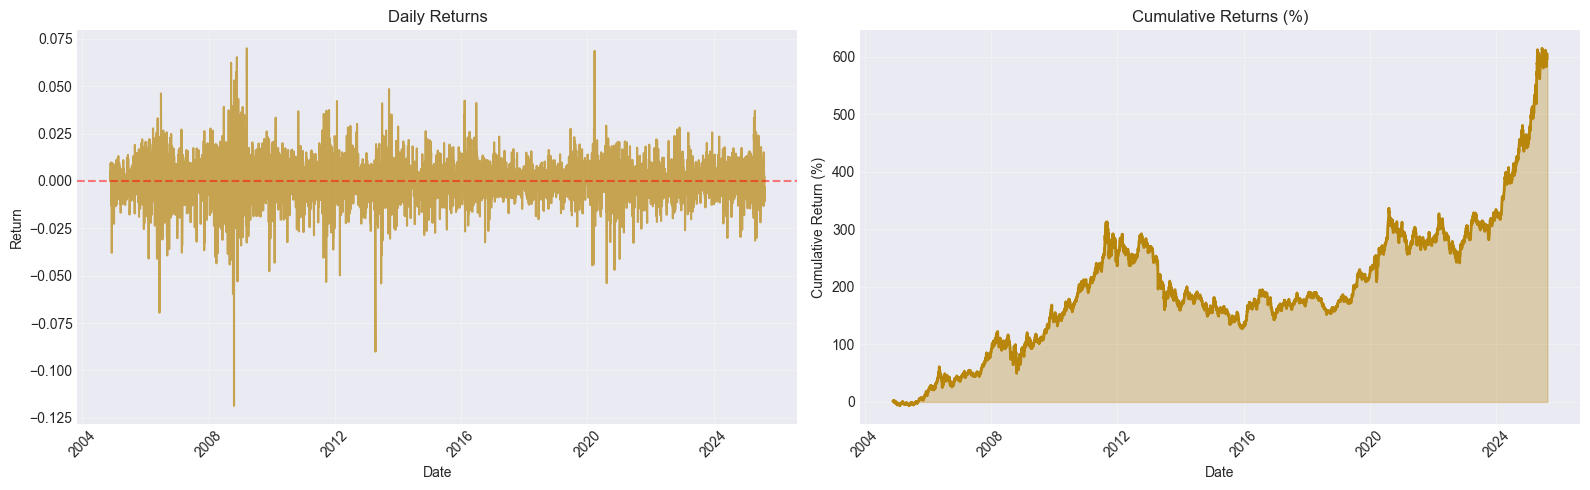

In [5]:
if price_cols:
    df_gold['daily_return'] = df_gold[price_cols[0]].pct_change()
    df_gold['cumulative_return'] = (1 + df_gold['daily_return']).cumprod() - 1
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    axes[0].plot(df_gold[date_col], df_gold['daily_return'], alpha=0.7, color='darkgoldenrod')
    axes[0].set_title('Daily Returns')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Return')
    axes[0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)
    
    axes[1].plot(df_gold[date_col], df_gold['cumulative_return'] * 100, linewidth=2, color='darkgoldenrod')
    axes[1].set_title('Cumulative Returns (%)')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Cumulative Return (%)')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3)
    axes[1].fill_between(df_gold[date_col], df_gold['cumulative_return'] * 100, alpha=0.3, color='darkgoldenrod')
    
    plt.tight_layout()
    plt.show()


## Key Statistics


In [6]:
if price_cols:
    price_col = price_cols[0]
    print("=== Gold Price Summary ===")
    print(f"Total Records: {len(df_gold)}")
    print(f"\nPrice Statistics:")
    print(f"  Average Price: ${df_gold[price_col].mean():.2f}")
    print(f"  Median Price: ${df_gold[price_col].median():.2f}")
    print(f"  Minimum Price: ${df_gold[price_col].min():.2f}")
    print(f"  Maximum Price: ${df_gold[price_col].max():.2f}")
    print(f"  Price Range: ${df_gold[price_col].max() - df_gold[price_col].min():.2f}")
    print(f"  Standard Deviation: ${df_gold[price_col].std():.2f}")
    
    if date_col:
        print(f"\nDate Range: {df_gold[date_col].min().strftime('%Y-%m-%d')} to {df_gold[date_col].max().strftime('%Y-%m-%d')}")
    
    if 'daily_return' in df_gold.columns:
        print(f"\nReturn Statistics:")
        print(f"  Average Daily Return: {df_gold['daily_return'].mean():.4f} ({df_gold['daily_return'].mean()*100:.2f}%)")
        print(f"  Daily Volatility: {df_gold['daily_return'].std():.4f}")
        print(f"  Total Return: {df_gold['cumulative_return'].iloc[-1]*100:.2f}%")


=== Gold Price Summary ===
Total Records: 5215

Price Statistics:
  Average Price: $131.26
  Median Price: $123.98
  Minimum Price: $41.02
  Maximum Price: $315.04
  Price Range: $274.02
  Standard Deviation: $51.07

Date Range: 2004-11-18 to 2025-08-12

Return Statistics:
  Average Daily Return: 0.0004 (0.04%)
  Daily Volatility: 0.0109
  Total Return: 595.96%
